In [35]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import spacy
from spacy.matcher import Matcher
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
from collections import Counter
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sayhi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
reviews = pd.read_csv('yelp_relishoceansidelahaina.csv')

In [65]:
reviews = reviews[:-1]

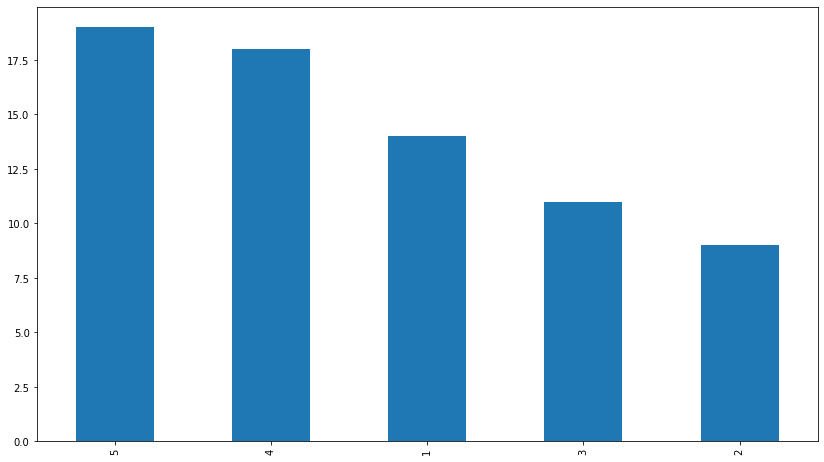

In [70]:
reviews['Rating'].value_counts().plot(kind='bar', figsize=(14,8));

In [39]:
reviews['Review'] = reviews['Review'].astype(str)
reviews['Rating'] = reviews['Rating'].str[:1].astype(int)
reviews.head()

,Date,Rating,Review,Name,Location,Rating_v1
0,7/28/2017,5,What a treat! We had a 6pm dinner reservation ...,J W.,"Lahaina, HI",3.0 star rating
1,4/7/2017,4,We decided to eat at Relish Oceanside on our l...,Katie W.,"Corona, CA",3.0 star rating
2,9/2/2017,2,The only good thing about this restaurant is t...,Richard M.,"Costa Mesa, CA",3.0 star rating
3,8/15/2017,5,What a beautiful location for intimate dinner ...,Dlite S.,"Rancho Palos Verdes, CA",3.0 star rating
4,8/8/2017,4,"Basing this review solely off of drinks, views...",Steve C.,"Boston, MA",3.0 star rating


In [40]:
#Lowercasing all the review content to make data normalised and keep words in uniform manner
reviews['Review'] = reviews['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [41]:
#removing special characters: Since these special characters create their own tokens and hence not usefull in any kind of 
#algorithm
reviews['review_new'] = reviews['Review'].str.replace('[^\w\s]','')

In [42]:
#removing stopwords from the reviews, because there words have no predictive power in reality
# for example: i, me, myself
stop = stopwords.words('english')
reviews['review_new'] = reviews['review_new'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [43]:
#Stemming: helps to gain relevant information as it reduces all words with the same roots to a 
#common form by removing suffixes such as -action, ing, -es and -ses.
#BUT  there can be problematic where there are spelling errors.

st = PorterStemmer()
reviews['review_stemmer'] = reviews['review_new'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


#LEMMATIZING: creates a common word reducing the use of tenses which likely removes suffixes
lem = WordNetLemmatizer()
reviews['review_lemmatizer'] = reviews['review_new'].apply(lambda x: " ".join([lem.lemmatize(word) for word in x.split()]))


In [44]:
reviews

,Date,Rating,Review,Name,Location,Rating_v1,review_new,review_stemmer,review_lemmatizer
0,7/28/2017,5,what a treat! we had a 6pm dinner reservation ...,J W.,"Lahaina, HI",3.0 star rating,treat 6pm dinner reservation started drinks ap...,treat 6pm dinner reserv start drink appet serv...,treat 6pm dinner reservation started drink app...
1,4/7/2017,4,we decided to eat at relish oceanside on our l...,Katie W.,"Corona, CA",3.0 star rating,decided eat relish oceanside last morning brea...,decid eat relish oceansid last morn breakfast ...,decided eat relish oceanside last morning brea...
2,9/2/2017,2,the only good thing about this restaurant is t...,Richard M.,"Costa Mesa, CA",3.0 star rating,good thing restaurant view service ordered app...,good thing restaur view servic order appet ent...,good thing restaurant view service ordered app...
3,8/15/2017,5,what a beautiful location for intimate dinner ...,Dlite S.,"Rancho Palos Verdes, CA",3.0 star rating,beautiful location intimate dinner enjoy amazi...,beauti locat intim dinner enjoy amaz sunset wa...,beautiful location intimate dinner enjoy amazi...
4,8/8/2017,4,"basing this review solely off of drinks, views...",Steve C.,"Boston, MA",3.0 star rating,basing review solely drinks views nice atmosph...,base review sole drink view nice atmospher als...,basing review solely drink view nice atmospher...
...,...,...,...,...,...,...,...,...,...
70,10/28/2015,5,this is a relaxing ocean front restaurant on t...,Tosh N.,"Los Angeles, CA",3.0 star rating,relaxing ocean front restaurant boardwalk kaan...,relax ocean front restaur boardwalk kaanapali ...,relaxing ocean front restaurant boardwalk kaan...
71,9/6/2015,2,service was horrible. i am surprised the westi...,Steven S.,"Riverside, CA",3.0 star rating,service horrible surprised westin allows brand...,servic horribl surpris westin allow brand asso...,service horrible surprised westin allows brand...
72,7/24/2015,1,i think having the option of zero stars should...,K G.,"Maricopa, AZ",3.0 star rating,think option zero stars possible came breakfas...,think option zero star possibl came breakfast ...,think option zero star possible came breakfast...
73,3/26/2015,2,the atmosphere clearly steals the show at this...,Cybernaut C.,"Vancouver, Canada",3.0 star rating,atmosphere clearly steals show oceanside resta...,atmospher clearli steal show oceansid restaur ...,atmosphere clearly steal show oceanside restau...


In [46]:
#the first score is sentiment polarity which tells if the sentiment is positive or negative 
#and the second score is subjectivity score to tell how subjective is the text

def sentiment(x):
    return TextBlob(x).sentiment  

reviews['review_score'] = reviews['review_new'].apply(sentiment)


In [47]:
reviews[['Polarity', 'Subjectivity']] = pd.DataFrame(reviews['review_score'].tolist(), index=reviews.index)

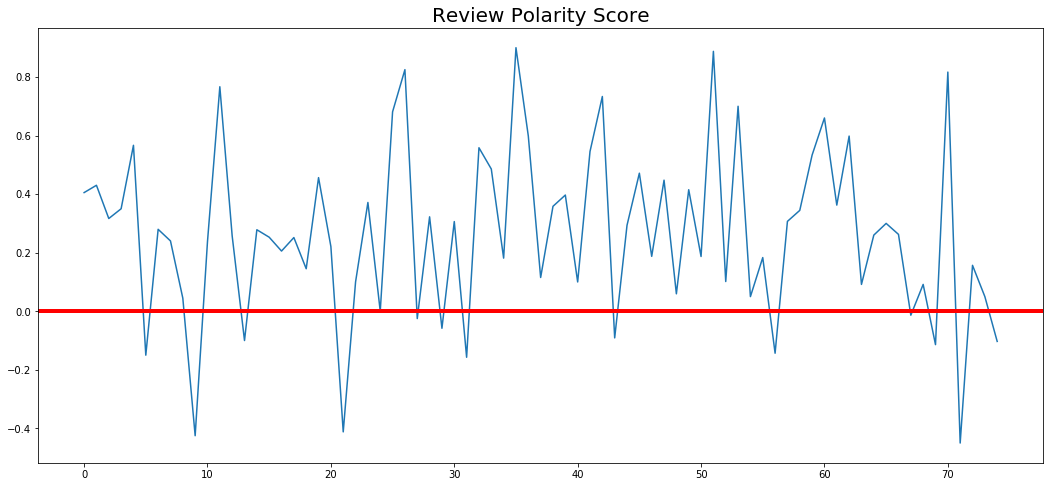

In [48]:
reviews['Polarity'].plot(figsize=(18,8));
plt.title('Review Polarity Score',fontsize = 20);
plt.axhline(y=0, linewidth=4, color='r');

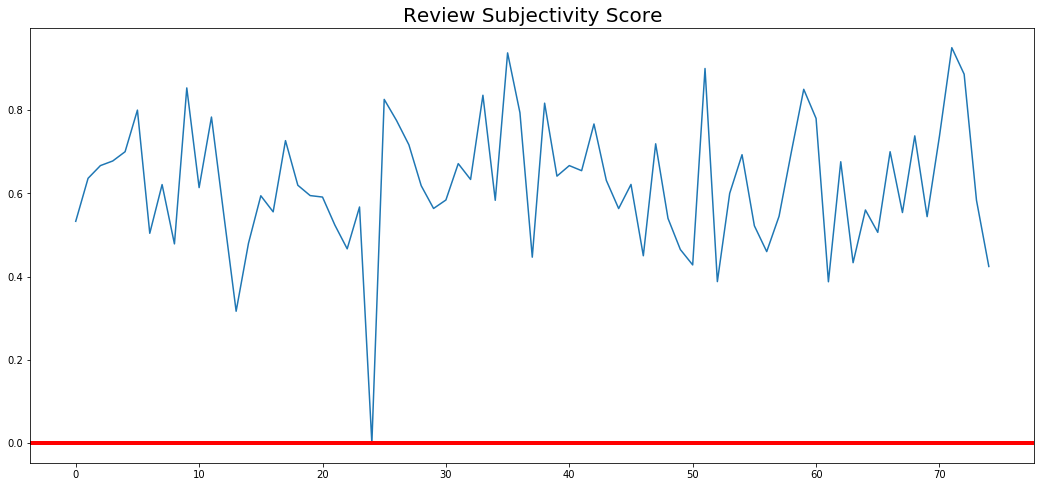

In [49]:
reviews['Subjectivity'].plot(figsize=(18,8));
plt.title('Review Subjectivity Score',fontsize = 20);
plt.axhline(y=0, linewidth=4, color='r');

In [50]:
nlp = spacy.load("en_core_web_sm")
analyser = SentimentIntensityAnalyzer()

In [51]:
def neg_terms(x):
    neg_wrd = []
    text = x.split('.')
    for i in text:    
        doc = nlp(i)    
        for tok in doc: 
            if tok.pos_ == 'ADJ' or tok.pos_ == 'VERB':
                pol = analyser.polarity_scores(tok.text)
                if pol.get('neg') > pol.get('pos'):
                    neg_wrd.append(tok.text)
    return neg_wrd
                    
reviews['Negative Terms'] = reviews['review_new'].apply(neg_terms)            

In [52]:
def pos_terms(x):
    pos_wrd = []
    text = x.split('.')
    for i in text:    
        doc = nlp(i)    
        for tok in doc: 
            if tok.pos_ == 'ADJ' or tok.pos_ == 'VERB':
                pol = analyser.polarity_scores(tok.text)
                if pol.get('neg') < pol.get('pos'):
                    pos_wrd.append(tok.text)
    return pos_wrd
                    
reviews['Positive Terms'] = reviews['review_new'].apply(pos_terms)

In [53]:
asp_ss = [] #Super set of aspect terms to be used in wordcloud later
def asp_terms(x):
    asp_wrd = []
    text = x.split('.')
    for i in text:    
        doc = nlp(i)    
        for tok in doc: 
            if tok.pos_ == 'NOUN' or tok.pos_ == 'PRONOUN':
                    asp_wrd.append(tok.text)
                    asp_ss.append(tok.text)
    return asp_wrd
                    
reviews['Aspect Terms'] = reviews['review_new'].apply(asp_terms)

In [24]:
reviews.head()

,Date,Rating,Review,Name,Location,Rating_v1,review_new,review_stemmer,review_lemmatizer,review_score,polarity,subjectivity,Negative Terms,Positive Terms,Aspect Terms
0,7/28/2017,5,what a treat! we had a 6pm dinner reservation ...,J W.,"Lahaina, HI",3.0 star rating,treat 6pm dinner reservation started drinks ap...,treat 6pm dinner reserv start drink appet serv...,treat 6pm dinner reservation started drink app...,"(0.4051948051948052, 0.5327922077922078)",0.405195,0.532792,[],"[best, thank, better, great, favorite]","[pm, dinner, reservation, drinks, appetizers, ..."
1,4/7/2017,4,we decided to eat at relish oceanside on our l...,Katie W.,"Corona, CA",3.0 star rating,decided eat relish oceanside last morning brea...,decid eat relish oceansid last morn breakfast ...,decided eat relish oceanside last morning brea...,"(0.43015873015873013, 0.6361111111111112)",0.430159,0.636111,[bad],"[kind, important, strong, great, amazing, beau...","[relish, morning, breakfast, home, protip, wan..."
2,9/2/2017,2,the only good thing about this restaurant is t...,Richard M.,"Costa Mesa, CA",3.0 star rating,good thing restaurant view service ordered app...,good thing restaur view servic order appet ent...,good thing restaurant view service ordered app...,"(0.31666666666666665, 0.6666666666666666)",0.316667,0.666667,[outrageous],"[good, good, good, nice]","[service, appetizers, food, swear, drinks, bar..."
3,8/15/2017,5,what a beautiful location for intimate dinner ...,Dlite S.,"Rancho Palos Verdes, CA",3.0 star rating,beautiful location intimate dinner enjoy amazi...,beauti locat intim dinner enjoy amaz sunset wa...,beautiful location intimate dinner enjoy amazi...,"(0.35000000000000003, 0.6777777777777777)",0.350000,0.677778,[],"[beautiful, enjoy, best]","[dinner, menu, chicken, meals, time, sprouts, ..."
4,8/8/2017,4,"basing this review solely off of drinks, views...",Steve C.,"Boston, MA",3.0 star rating,basing review solely drinks views nice atmosph...,base review sole drink view nice atmospher als...,basing review solely drink view nice atmospher...,"(0.5666666666666667, 0.7000000000000001)",0.566667,0.700000,[],"[nice, happy, worth]","[basing, review, views, atmosphere, hour, cock..."


In [54]:
#Frequency Distribution for Wordcloud
fdist = FreqDist(asp_ss)
topterms = fdist.most_common(50)

In [55]:
# concatenating the top terms from the list to be passed onto the wordcloud
term_str = ' '
for a, c in topterms:
    term_str = term_str + a + ' '

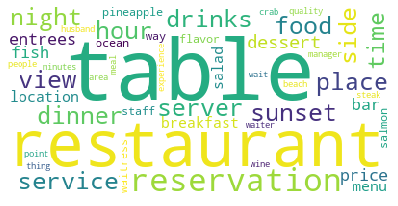

In [56]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300).generate(term_str)
plt.imshow(wordcloud)
wordcloud.to_file("wordcloud_aspect_terms.png")
plt.tight_layout()
plt.axis("off")
plt.show()

In [57]:
#Definig a pattern for words to retrieve the required N-grams
ngrams_wc = []
def sp_pattern(x):
    ngrams_ss = []
    n_g = []
    n_g1 = []
    n_g2 = []
    n_g3 = []
    n_g4 = []
    n_g5 = []
    matcher = Matcher(nlp.vocab)
    text = x.split('.')
    for i in text:    
        doc = nlp(i)    
        pattern = [
                {'POS': 'VERB'}, 
                {'POS': 'NOUN'},
                {'POS': 'NOUN', 'OP': '?'},
                ]

        pattern1 = [
                {'POS': 'ADJ'}, 
                {'POS': 'NOUN'},
                {'POS': 'NOUN', 'OP': '?'},
                ]

        pattern2 = [
                {'DEP': 'ROOT', 'OP': '?'},
                {'POS': 'ADJ'}, 
                {'POS': 'PROPN'},
                ]

        pattern3 = [
                {'POS': 'ADJ'}, 
                {'POS': 'VERB'},
                ]

        pattern4 = [
                {'POS': 'PROPN', 'OP': '?'}, 
                {'POS': 'NOUN'},
                {'POS': 'ADJ'},
                ]

        pattern5 = [ 
                {'POS': 'VERB'},
                {'POS': 'PROPN'},
                ]
        
        matcher.add('PATTERN', None, pattern)

        if len(i) > 1:
            matches = matcher(doc)
            for match_id, start, end in matches:
                # Get the matched span
                ngrams = doc[start:end]
                n_g.append(ngrams.lemma_)
                ngrams_ss.append(ngrams.lemma_)
                ngrams_wc.append(ngrams.lemma_)
 
        matcher.add('PATTERN1', None, pattern1)
        if len(i) > 1:
            matches = matcher(doc)
            for match_id, start, end in matches:
                # Get the matched span
                ngrams = doc[start:end]
                if ngrams.lemma_ not in n_g:
                    n_g1.append(ngrams.lemma_)
                    ngrams_ss.append(ngrams.lemma_)
                    ngrams_wc.append(ngrams.lemma_)

        matcher.add('PATTERN2', None, pattern2)
        if len(i) > 1:
            matches = matcher(doc)
            for match_id, start, end in matches:
                # Get the matched span
                ngrams = doc[start:end]
                if ngrams.lemma_ not in n_g and ngrams.lemma_ not in n_g1:
                    n_g2.append(ngrams.lemma_)
                    ngrams_ss.append(ngrams.lemma_)
                    ngrams_wc.append(ngrams.lemma_)
            
        matcher.add('PATTERN3', None, pattern3)
        if len(i) > 1:
            matches = matcher(doc)
            for match_id, start, end in matches:
                # Get the matched span
                ngrams = doc[start:end]
                if ngrams.lemma_ not in n_g and ngrams.lemma_ not in n_g1 and ngrams.lemma_ not in n_g2:
                    n_g3.append(ngrams.lemma_)
                    ngrams_ss.append(ngrams.lemma_)
                    ngrams_wc.append(ngrams.lemma_)
            
        matcher.add('PATTERN4', None, pattern4)
        if len(i) > 1:
            matches = matcher(doc)
            for match_id, start, end in matches:
                # Get the matched span
                ngrams = doc[start:end]
                if ngrams.lemma_ not in n_g and ngrams.lemma_ not in n_g1 and ngrams.lemma_ not in n_g2 and ngrams.lemma_ not in n_g3:
                    n_g4.append(ngrams.lemma_)
                    ngrams_ss.append(ngrams.lemma_)
                    ngrams_wc.append(ngrams.lemma_)
            
        matcher.add('PATTERN5', None, pattern5)
        if len(i) > 1:
            matches = matcher(doc)
            for match_id, start, end in matches:
                # Get the matched span
                ngrams = doc[start:end]
                if ngrams.lemma_ not in n_g and ngrams.lemma_ not in n_g1 and ngrams.lemma_ not in n_g2 and ngrams.lemma_ not in n_g3 and ngrams.lemma_ not in n_g4:
                    n_g5.append(ngrams.lemma_)
                    ngrams_ss.append(ngrams.lemma_)
                    ngrams_wc.append(ngrams.lemma_)
    
    return ngrams_ss

In [58]:
reviews['N-Grams'] = reviews['review_new'].apply(sp_pattern)

In [59]:
fdist = FreqDist(ngrams_wc)
topterms = fdist.most_common(50)

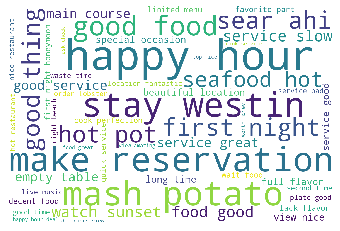

In [60]:
mylist = []
for a,c in topterms:
    mylist.append(a)

wordc=Counter(mylist)

wordcloud = WordCloud(stopwords=STOPWORDS, width = 1500, height = 1000,
                          background_color='white', 
                      max_words=300).generate_from_frequencies(wordc)
wordcloud.to_file("wordcloud_n_grams.png")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

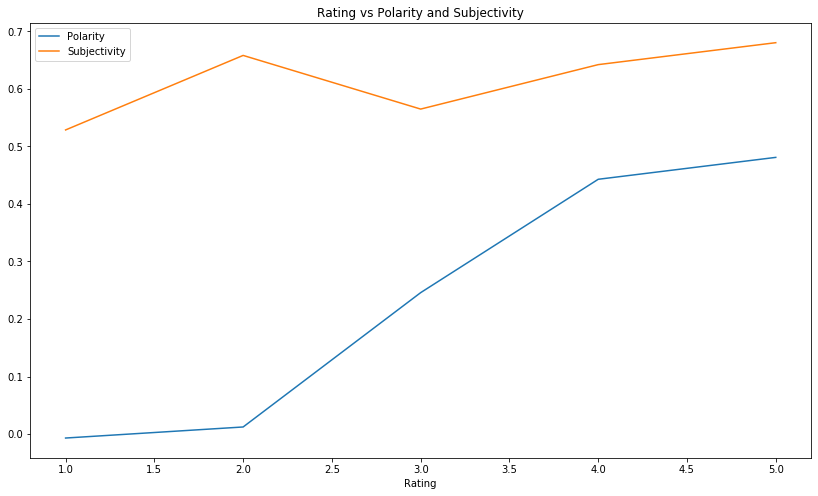

In [61]:
df_review = reviews.groupby(['Rating']).mean()
df_review.plot(figsize=(14,8),title = 'Rating vs Polarity and Subjectivity');